# Prepare libraries

In [1]:
import collections
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
from apyori import apriori

%matplotlib inline

# Read data

In [2]:
store_data = pd.read_csv('./toy_data.csv')

In [3]:
store_data.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### There is no header at the first line.

In [4]:
store_data = pd.read_csv('./toy_data.csv', header=None)

In [5]:
store_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(store_data.shape)

(7501, 20)


##### Change the data set into 2-dimensional list to apply Apriori library. 

In [7]:
transactions = []
for i in range(len(store_data)):
#     transactions.append([str(store_data.iloc[i,j]) for j in range(len(store_data.iloc[i]))])
    temp = []
    for j in range(len(store_data.iloc[i])):
        item = str(store_data.iloc[i][j])
        if item != 'nan':
            temp.append(item)
        transactions.append(temp)

In [8]:
item_count = dict()

for i in range(len(transactions)):
    for j in range(len(transactions[i])):
        cnt = 1
        item = str(transactions[i][j])
        if item in item_count:
            cnt += item_count.get(item)
        item_count[item] = cnt

# sort dictionary by name of item
item_count = collections.OrderedDict(sorted(item_count.items()))

print('Therer are',len(item_count),'items.')

for k in item_count:
    print(k,":", item_count.get(k))

Therer are 120 items.
 asparagus : 20
almonds : 3060
antioxydant juice : 1340
asparagus : 700
avocado : 5000
babies food : 680
bacon : 1300
barbecue sauce : 1620
black tea : 2140
blueberries : 1380
body spray : 1720
bramble : 280
brownies : 5060
bug spray : 1300
burger sauce : 880
burgers : 13080
butter : 4520
cake : 12160
candy bars : 1460
carrots : 2300
cauliflower : 720
cereals : 3860
champagne : 7020
chicken : 9000
chili : 920
chocolate : 24600
chocolate bread : 640
chutney : 620
cider : 1580
clothes accessories : 1260
cookies : 12060
cooking oil : 7660
corn : 720
cottage cheese : 4780
cream : 140
dessert wine : 660
eggplant : 1980
eggs : 26960
energy bar : 4060
energy drink : 4000
escalope : 11900
extra dark chocolate : 1800
flax seed : 1360
french fries : 25640
french wine : 3380
fresh bread : 6460
fresh tuna : 3340
fromage blanc : 2040
frozen smoothie : 9500
frozen vegetables : 14300
gluten free bar : 1040
grated cheese : 7860
green beans : 1300
green grapes : 1360
green tea : 1

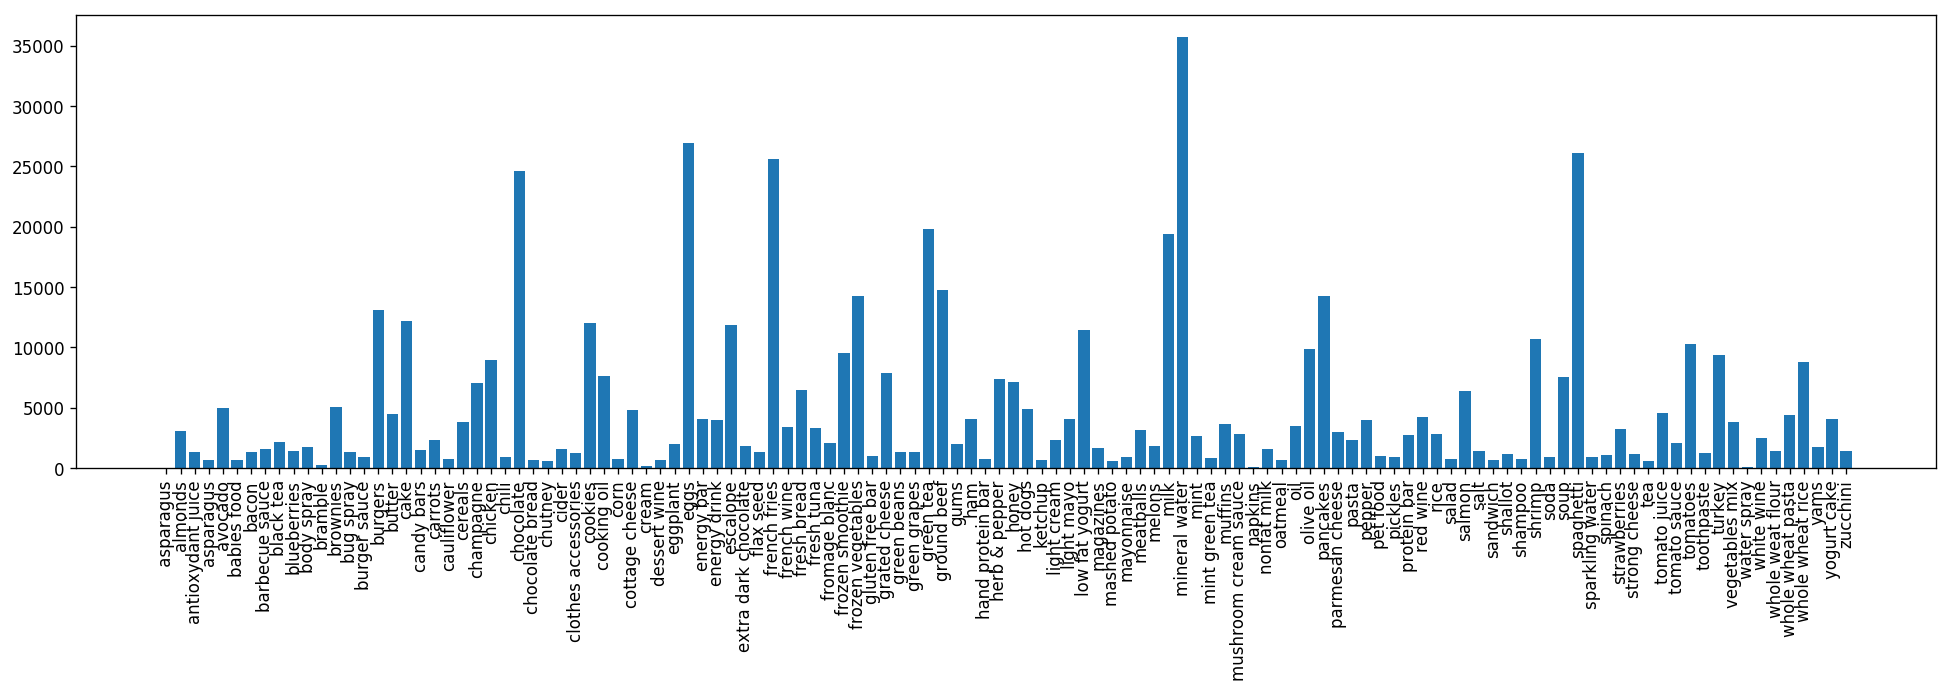

In [9]:
figure(num=None, figsize=(20, 5), dpi=120)
plt.bar(range(len(item_count)), list(item_count.values()), align='center')
plt.xticks(range(len(item_count)), list(item_count.keys()), rotation=90)

plt.show()

# Apriori

**Support **

ex) for item B

support(B) = (transactions containing (B)) / (total transactions)

**Confidence **

ex) The likelihood that an item B is also bought if item A is bought.

confidence(A &rarr; B) = (transactions containing both (A and B)) / (transactions containing A)

**Lift**

ex) The increase in the ratio of sale of B when A i sold.

lift(A &rarr; B) = (confidence (A &rarr; B)) / (support (B))

##### Parmeters of apriori

https://github.com/ymoch/apyori

The default values for parameters are

min_support = 0.1

min_confidence = 0.5

min_lift = 0.0

min_length = None (specifies the minimum number of items)

In [10]:
association_rules = apriori(
    transactions, 
    min_support=0.0045, 
    min_confidence=0.2, 
    min_lift=3,
    min_length=2
)

association_results = list(association_rules)

In [11]:
print(len(association_results))

24


In [12]:
cnt = 1
for item in association_results:
    items = [i for i in item.items]
    print(cnt)
    print("Rule:\t" + items[0] + " -> " + items[1])
    print(items[0],'\'s tractions:',item_count[items[0]])
    print("Support:\t",item.support)
    print("Confidence:\t", item.ordered_statistics[0][2])
    print("Lift:\t", item.ordered_statistics[0][3])
    print('==============================================')
    cnt += 1

1
Rule:	chicken -> light cream
chicken 's tractions: 9000
Support:	 0.004532728969470737
Confidence:	 0.29059829059829057
Lift:	 4.84395061728395
2
Rule:	escalope -> mushroom cream sauce
escalope 's tractions: 11900
Support:	 0.005732568990801226
Confidence:	 0.3006993006993007
Lift:	 3.790832696715049
3
Rule:	pasta -> escalope
pasta 's tractions: 2360
Support:	 0.005865884548726837
Confidence:	 0.3728813559322034
Lift:	 4.700811850163794
4
Rule:	herb & pepper -> ground beef
herb & pepper 's tractions: 7420
Support:	 0.015997866951073192
Confidence:	 0.3234501347708895
Lift:	 3.2919938411349285
5
Rule:	ground beef -> tomato sauce
ground beef 's tractions: 14740
Support:	 0.005332622317024397
Confidence:	 0.3773584905660377
Lift:	 3.840659481324083
6
Rule:	olive oil -> whole wheat pasta
olive oil 's tractions: 9880
Support:	 0.007998933475536596
Confidence:	 0.2714932126696833
Lift:	 4.122410097642296
7
Rule:	pasta -> shrimp
pasta 's tractions: 2360
Support:	 0.005065991201173177
Confid